#  Analyse du diffractogramme du matériau RbLaS<sub>2</sub>
Il s'agit de déterminer les 3 premiers pics du diffractogramme pour un rayonnement X incident CuK$\alpha$ de longueur d’onde $\lambda=1.54060$ Å.

In [1]:
import pymatgen as mtg
import matplotlib as mpl
import matplotlib.pyplot as plt

from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter, CifParser
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from IPython.display import display, Image

mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

material = 'mp-9361'
mprest = MPRester('M7AL9FnT6RhfdTz4')
lam = 1.54060 #[Å]

### Import de la structure et téléchargement du .CIF

In [2]:
struct = mprest.get_structure_by_material_id(material)   #structure from mp_id
struct = SpacegroupAnalyzer(struct).get_conventional_standard_structure()
cif = CifWriter(struct, symprec=0.1)

#print(cif)
#print(structure)

### Diffractogramme du RbLaS<sub>2</sub>

Lorsque l'on bombarde cristal avec des rayons X, on observe des interférences constructives et destructives entre leurs réflexions sur les plans crystallins successifs $d_{hkl}$. On obtient les directions des interférences constructives (représentées par des pics d'intensité sur le diffractogramme) par la loi de Bragg: $$n\lambda = 2d_{hkl}\sin\theta$$
avec
\begin{align*}
    n       & \mbox{ l'ordre de la réflexion}\\
    \lambda & \mbox{ la longueur d'onde en [Å] du rayonnement}\\
    d_{hkl} & \mbox{ la distance entre deux plans (h k l) consécutifs du réseau direct}\\
    \theta  & \mbox{ tel que } 2\theta \mbox{ est l'angle entre les directions d’incidence et d’observation}\\
\end{align*}

L'intensité des pics de diffraction sur matériau étudié sont représentés sur le graphe suivant en pourcentage d'intensité du pic maximal, en fonction de l'angle $2\theta$.

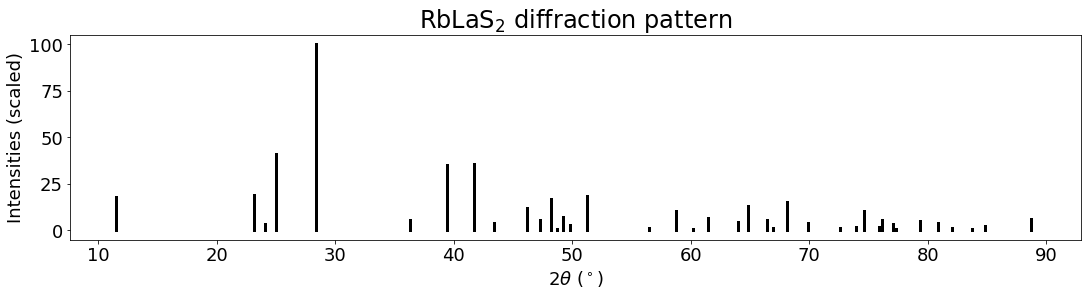

In [3]:
xrd = XRDCalculator(lam, symprec=0.1)
fig, axs = plt.subplots(figsize=(15, 4), constrained_layout=True)
xrd.get_plot(struct,annotate_peaks=False, ax=axs, with_labels=True,fontsize=12)
axs.set_title('$\mathregular{RbLaS_2}$ diffraction pattern')
plt.show()


### Premiers pics du diffractogramme
Grâce à la librairie pymatgen.analysis.diffraction.xrd, on peut facilement obtenir les angles $2\theta$, les indices de Miller associés, la distance interplanaire ainsi que l'intensité relative des différents pics par rapport au plus élevé.

In [4]:
pattern = xrd.get_pattern(struct,scaled=True, two_theta_range=None)
for i in range(3):
    print("Pic n°%d:" %(i+1))
    print("Angle 2𝜃: \t\t%.2f [°]"  %pattern.x[i])
    print("Intensité relative:\t%.2f [%%]"  %pattern.y[i])
    print("Indices de Miller:\t%s"  %(pattern.hkls[i][0]["hkl"],))
    print("Distance interplanaire: %.2f [Å]"  %pattern.d_hkls[i])
    print("--------------------------------------------------------")

Pic n°1:
Angle 2𝜃: 		11.51 [°]
Intensité relative:	18.01 [%]
Indices de Miller:	(0, 0, 0, 3)
Distance interplanaire: 7.68 [Å]
--------------------------------------------------------
Pic n°2:
Angle 2𝜃: 		23.14 [°]
Intensité relative:	19.27 [%]
Indices de Miller:	(0, 0, 0, 6)
Distance interplanaire: 3.84 [Å]
--------------------------------------------------------
Pic n°3:
Angle 2𝜃: 		24.04 [°]
Intensité relative:	3.25 [%]
Indices de Miller:	(1, 0, -1, 1)
Distance interplanaire: 3.70 [Å]
--------------------------------------------------------
